# Algerian Forest Fires Dataset


## Life cycle of Machine learning Project (Pipeline)



1.Understanding the Problem Statement

2.Data Collection

3.Exploratory data analysis

4.Data Cleaning

5.Data Pre-Processing


# Attribute Information:


1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 

3. RH : Relative Humidity in %: 21 to 90 

4. Ws :Wind speed in km/h: 6 to 29 

5. Rain: total day in mm: 0 to 16.8 FWI Components 

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 

11. Fire Weather Index (FWI) Index: 0 to 31.1 12. Classes: two classes, namely Fire and notFire

# Data Set Information


 The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the
northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (class)

The 244 instances have been classified into fire (138 classes) and notfire(106 classes) classes.

Source: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

# Problem statement


 This dataset comprises features of forest fire which will lead to two classes fire and not fire in Bejaia region and Sidi Bel-abbes region of Algeria.

User can predict the fire will occur or not based on input features.

Prediction results in the prior arrangements to save the region from Forest Fire.

In [1]:
# importing required libraries for EDA
# the main aim is to understand data in better way

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

In [7]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
data.shape

(246, 14)

In [9]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [13]:
data.isnull().sum().sum()

14

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [12]:
data.duplicated().sum()

0

# Cleaning dataset

In [14]:
data.iloc[0:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Drop three columns that are not correlated rows in between Dataset at index 125,126


data.drop([122,123],axis = 0,inplace = True)
data.reset_index(inplace = True)
data.drop("index",axis =1,inplace = True)

In [16]:
data.shape

(244, 14)

In [17]:
data.iloc[0:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


## Create an new column name as Region in which:

1' is denoted by Bejaia region.

'2' is denoted by Sidi Bel-abbes region.

In [19]:
data.loc[:122,'Region'] = 'Bejaia'
data.loc[122:,'Region'] = 'Sidi Bel-abbes'


In [23]:
data.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
99,08,09,2012,30,73,17,0.9,62,2.6,8.4,1.1,3,0.4,not fire,Bejaia
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,Bejaia
238,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,Sidi Bel-abbes
78,18,08,2012,36,54,18,0,89.4,20,110.9,9.7,27.5,16.1,fire,Bejaia
187,05,08,2012,34,42,17,0.1,88.3,23.6,52.5,19,23.5,12.6,fire,Sidi Bel-abbes


In [22]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [29]:
data.columns = [i.strip() for i in data.columns]
data.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
data.Classes = data.Classes.str.strip()
data.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [36]:
data['Classes'].dtype


dtype('O')

Not fire: 0

Fire : 1

In [37]:
# conversion of categorical into numerical feature
data["Classes"] = data["Classes"].map({"not fire": 0,"fire" : 1})
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,Bejaia


In [39]:
data['Classes'].dtype


dtype('float64')

In [41]:
#Showing features with datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    float64
 14  Region       244 non-null    object 
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [49]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,Bejaia
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0,1.7,0,0.0,Bejaia
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia


In [57]:
# Changing The DataTypes of the Columns

data["day"] =data["day"].astype(int)
data["month"] =data["month"].astype(int)
data["year"]=data["year"].astype(int)
data["Temperature"]=data["Temperature"].astype(int)
data["RH"]=data["RH"].astype(float)
data["Ws"]=data["Ws"].astype(float)
data["Rain"]=data["Rain"].astype(float)
data["FFMC"]=data["FFMC"].astype(float)
data["DMC"]=data["DMC"].astype(float)
data["ISI"]=data["ISI"].astype(float)
data["BUI"]=data["BUI"].astype(float)
data["Classes"]=data["Classes"].astype(float)


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    float64
 14  Region       244 non-null    object 
dtypes: float64(8), int32(4), object(3)
memory usage: 24.9+ KB


## Encode 'Region' column such that:



 1' is denoted by Bejaia region.

'2' is denoted by Sidi Bel-abbes region

In [61]:
data['Date'] = pd.to_datetime(data[['day','month','year']])
data.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [62]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


In [63]:
data.shape

(244, 13)

In [64]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
Date           0
dtype: int64

In [66]:
data["Classes"].unique()

array([ 0.,  1., nan])

### Here we found null(nan:not a number) value

#### We can replace it with mode of the column('Classes'). We choose mode because Classes column is categorical in nature.

In [67]:
data['Classes'] =data['Classes'].fillna(data['Classes'].mode()[0])

In [68]:
data["Classes"].unique()

array([0., 1.])

In [69]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

#### memory usage of each column in bytes



In [70]:
data.memory_usage()  


Index           128
Temperature     976
RH             1952
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
Date           1952
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    float64       
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(1), object(3)
memory usage: 24.0+ KB


In [72]:
data["RH"] = data["RH"].astype(int)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


## Observations:

There is total 244 rows and 13 columns.

There are No Null Value in Dataset

There is total 4 data types float64, int64, object and datetime64.

Dtypes included float64 = 6 Columns, int64 = 3 Columns, object = 3 Columns and datetime64 = 1
Total Memory Usage is 23.0+ KB

## Bifurcation into Numerical and Categorical Columns


### Numerical Dataset



In [75]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))


We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'Date']


### Categorical Dataset



In [81]:
# 1. Getting Categorical features from dataset 
# 2. Creating Categorical dataframe
categorical_features = [feature for feature in data.columns if data[feature].dtype =="O"]

# Print Categorical Features
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))



 We have 3 categorical features : ['DC', 'FWI', 'Region']


In [85]:
df_num = data[numerical_features]
df_num

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0,2012-09-29


In [86]:
#df_cat = data[categorical_features]
df_cat

,DC,FWI,Region
0,7.6,0.5,Bejaia
1,7.6,0.4,Bejaia
2,7.1,0.1,Bejaia
3,6.9,0,Bejaia
4,14.2,0.5,Bejaia
...,...,...,...
239,44.5,6.5,Sidi Bel-abbes
240,8,0,Sidi Bel-abbes
241,7.9,0.2,Sidi Bel-abbes
242,15.2,0.7,Sidi Bel-abbes


## Feature Information


In [87]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


### Weather data observations:-



Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
        
RH : Relative Humidity in %: 21 to 90
        
Ws :Wind speed in km/h: 6 to 29
        
Rain: total day in mm: 0 to 16.8

### FWI Components

FFMC(Fine Fuel Moisture Code) index from the FWI system: 28.6 to 96

DMC(Duff Moisture Code) index from the FWI system: 0.7 to 65.9

DC(Drought Code) index from the FWI system: 7 to 220.4

(ISI) Initial Spread Index from the FWI system: 0 to 19 (BUI) Buildup Index from the FWI system: 1.1 to 68 (FWI) Fire Weather Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire.

Region: Two Regions, namely Bejaia Region indicated with 0 and Sidi Bel-Abbes Region indicated with 1.

#### About Date Feature

#### Date :- Date Displayed in (DD/MM/YYYY) format.


## Univariate Analysis


#### The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### FOR CATEGORICAL FEATURE



In [91]:
import warnings
warnings.filterwarnings("ignore")

data.var()


Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

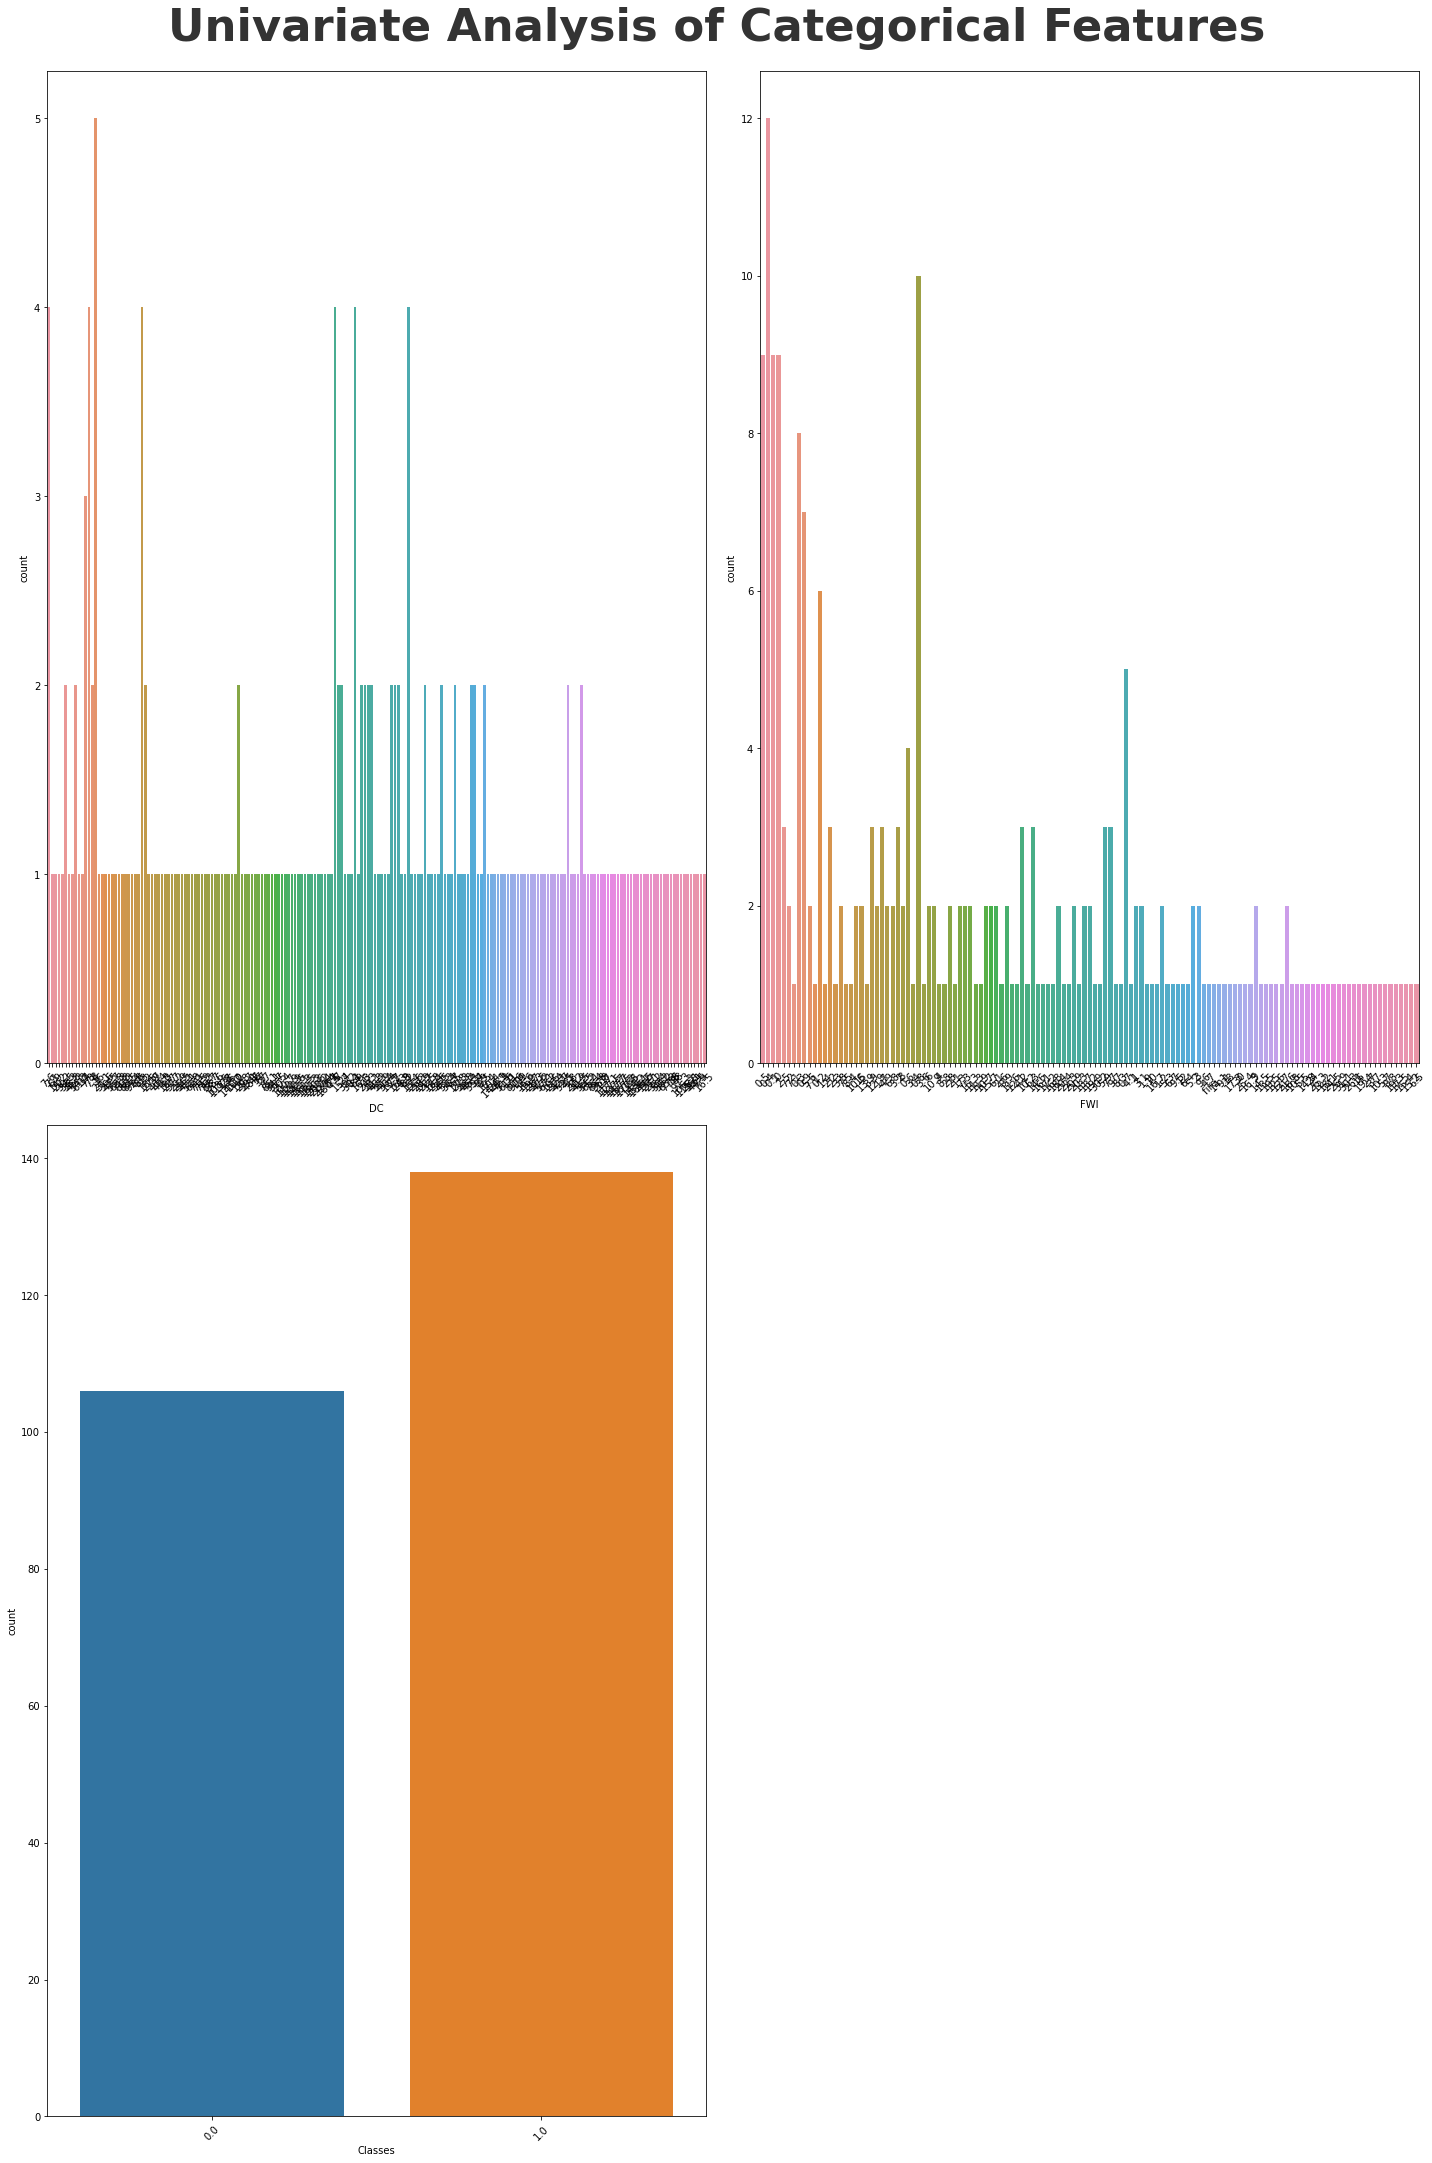

In [97]:

plt.figure(figsize=(20, 30))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=45, fontweight='bold', alpha=0.8, y=1.)
df_cat = ['DC', 'FWI', 'Classes']
for i in range(0, len(df_cat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[df_cat[i]])
    plt.xlabel(df_cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### observation -

Extreme value of Temperature is above 40

Most of the time RH is above 30

WS values lie between 10 to 20
 

ValueError: num must be 1 <= num <= 8, not 9

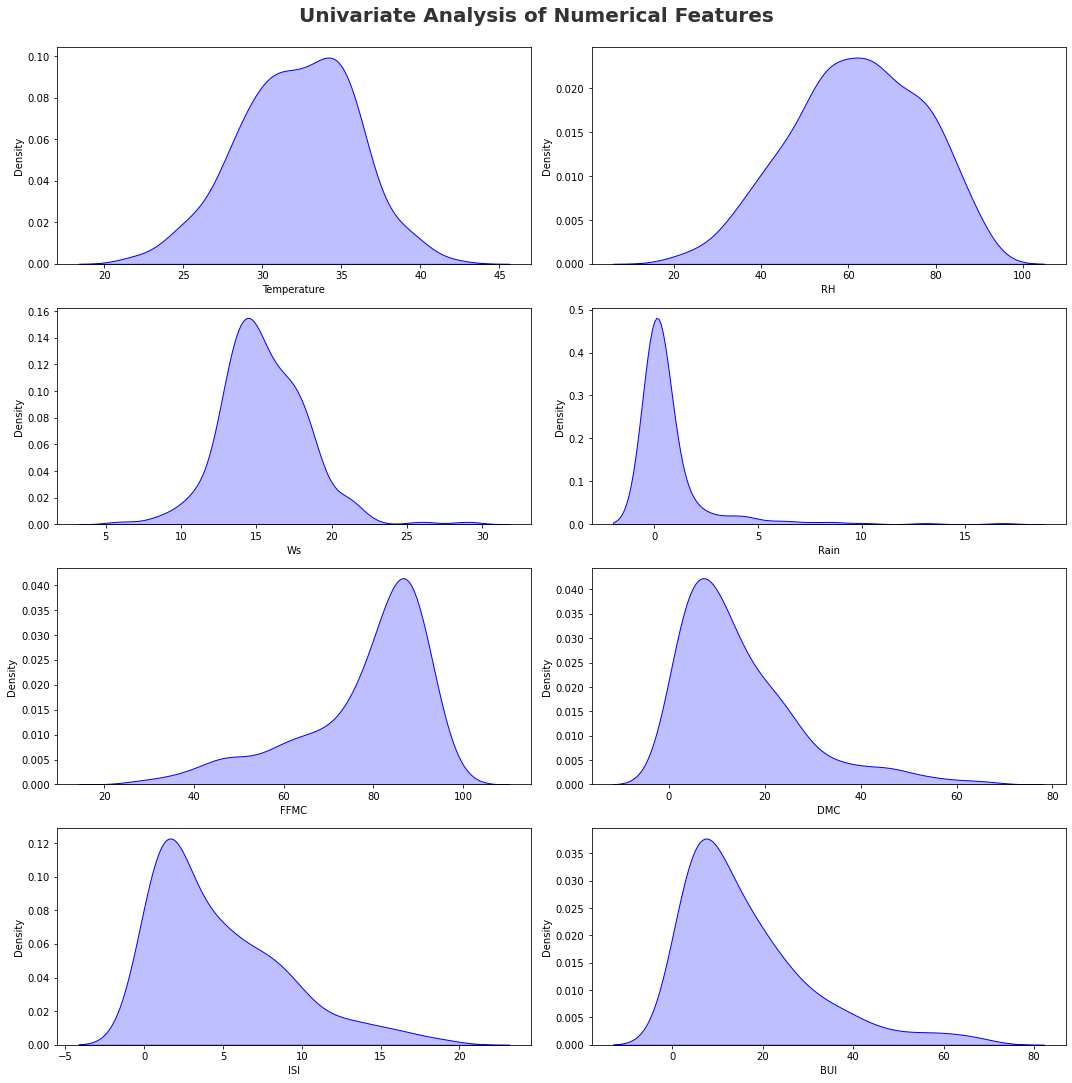

In [99]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(4, 2, i+1) #'5' refers length and '2' refers width of graph
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observations

Rain,ISI,BUI,DMC are right skewed and postively skewed.

FFMC is a Left skewed and Negetively skewed.

Outliers in Rain, ISI, BUI, DMC and FFMC
 

### scatter plot to see the trends in each numerical column



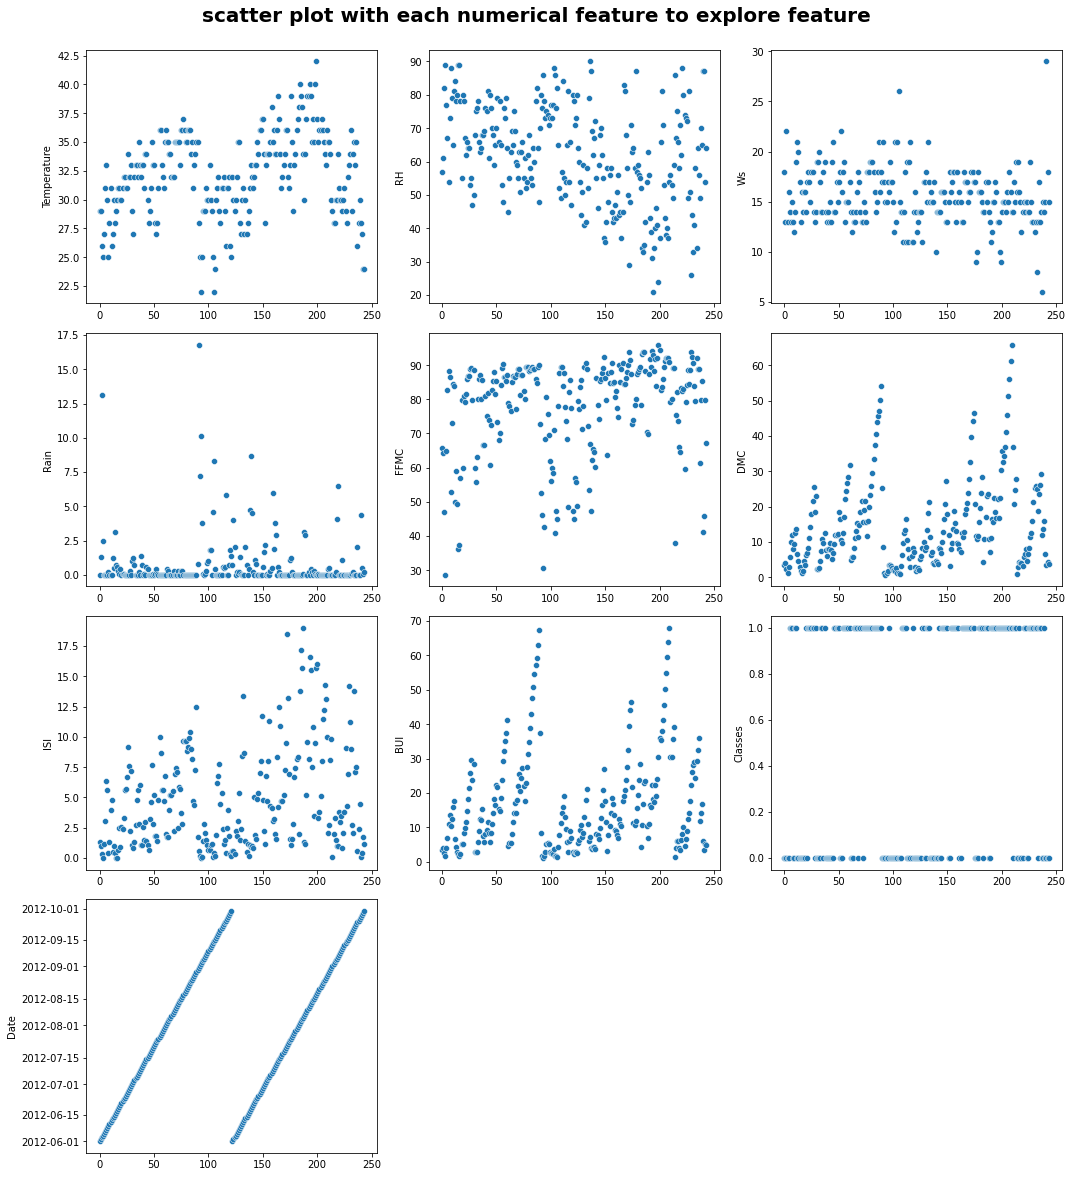

In [110]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=data.index, data=data)
    plt.tight_layout()

### observation -

Extreme value of Temperature is above 40

Most of the time RH is above 30

WS values lie between 10 to 20

# Bivariate analysis and Multivariate analysis


In [ ]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

#### strip plot to see the relationship between numerical features and target variable



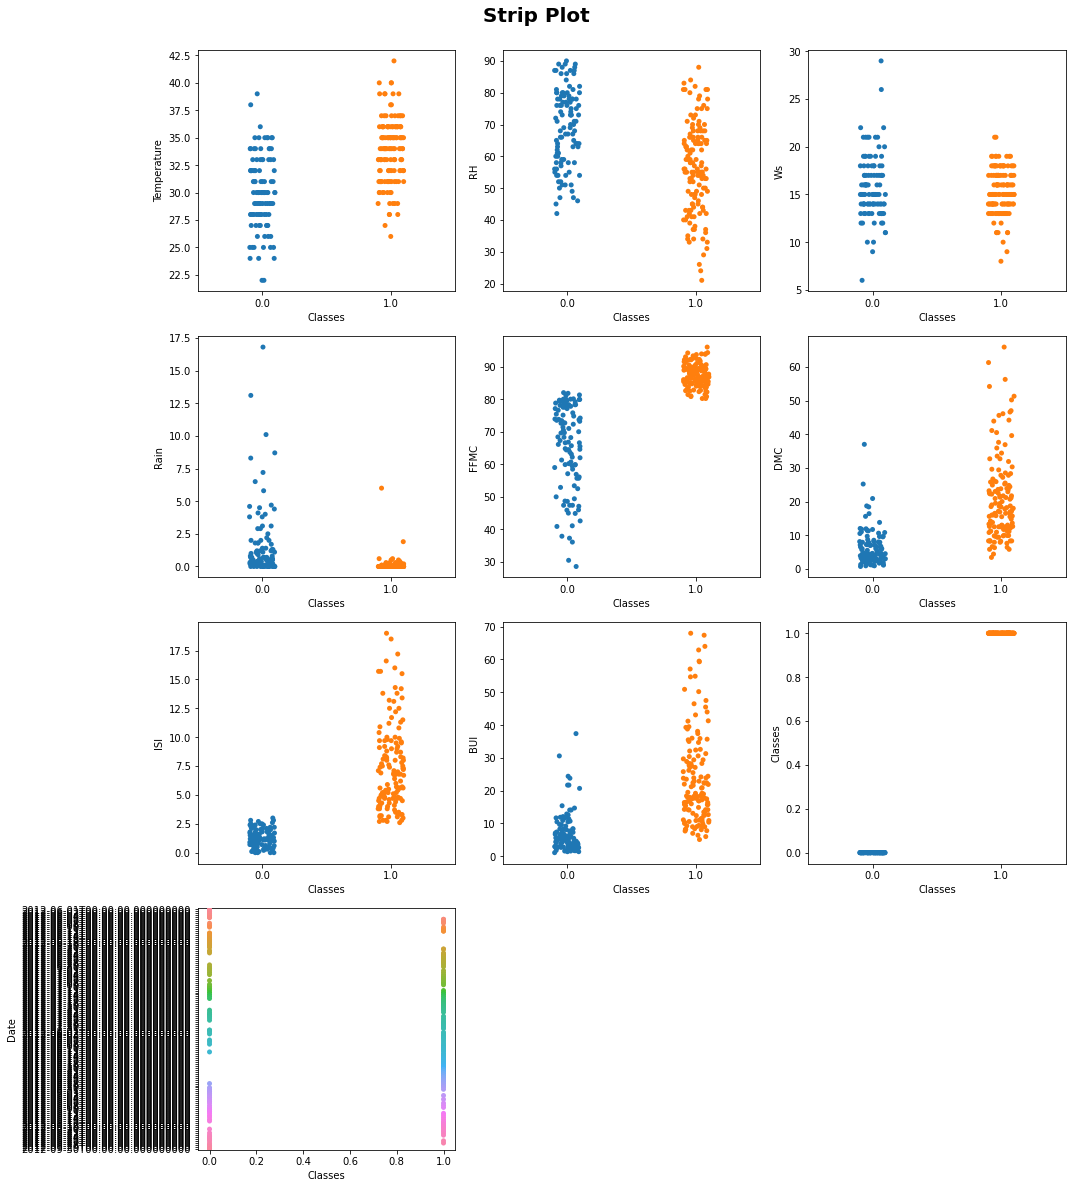

In [118]:
plt.figure(figsize =(15,20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=data)
    plt.tight_layout()


##### observation -



#### Note :- Here 0 = 'not Fire' and 1 = 'Fire'

places with higher temperature has fire

places with lower RH has fire

places wiht ffmc > 80 has fire

places wiht ISI > 2.5 has fire

places with Rain < 2 has fire

### HEATMAP

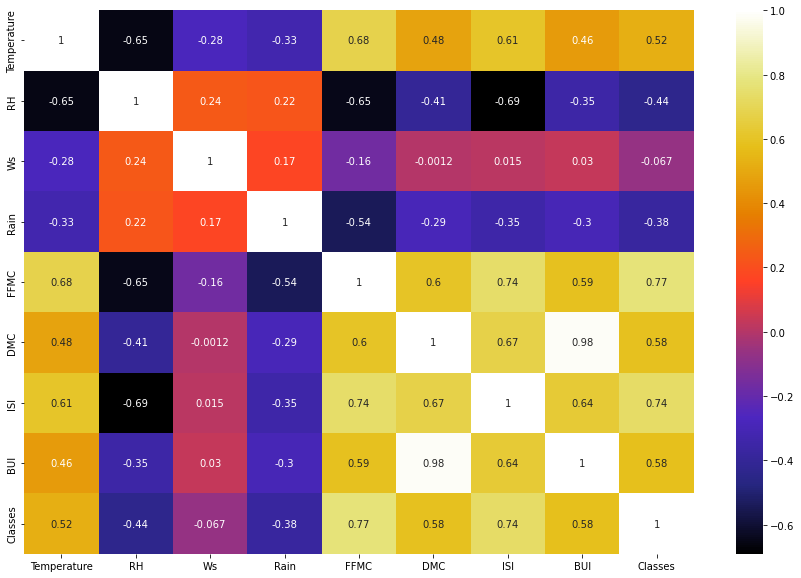

In [120]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

### observation -

Highly +ve correlated features are DMC and BUI

Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI
 

### BOXPLOT : To find outliers



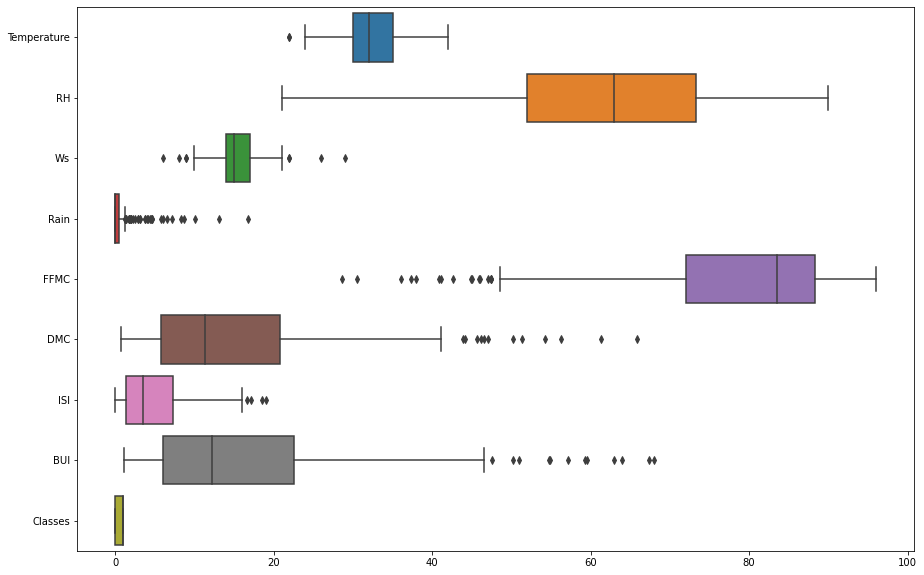

In [121]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data,orient="h");

### Observation:-

RH, Rain, FFMC, DMC BUI has many outliers

## Graphical Analysis
Most of the Fire occurs at which Regeion?

# Graphical Analysis
Most of the Fire occurs at which Regeion?

<AxesSubplot:xlabel='Region', ylabel='Classes'>

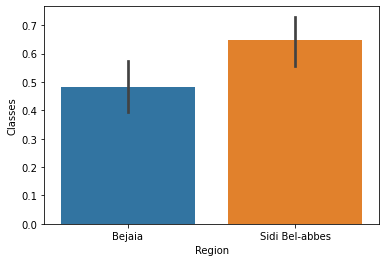

In [126]:
sns.barplot(x="Region",y="Classes",data=data)


### Observation


Sidi-Bel-Abbes Region has Most of the Time Fire Took Placed.



### Frequency (Range) of each feature


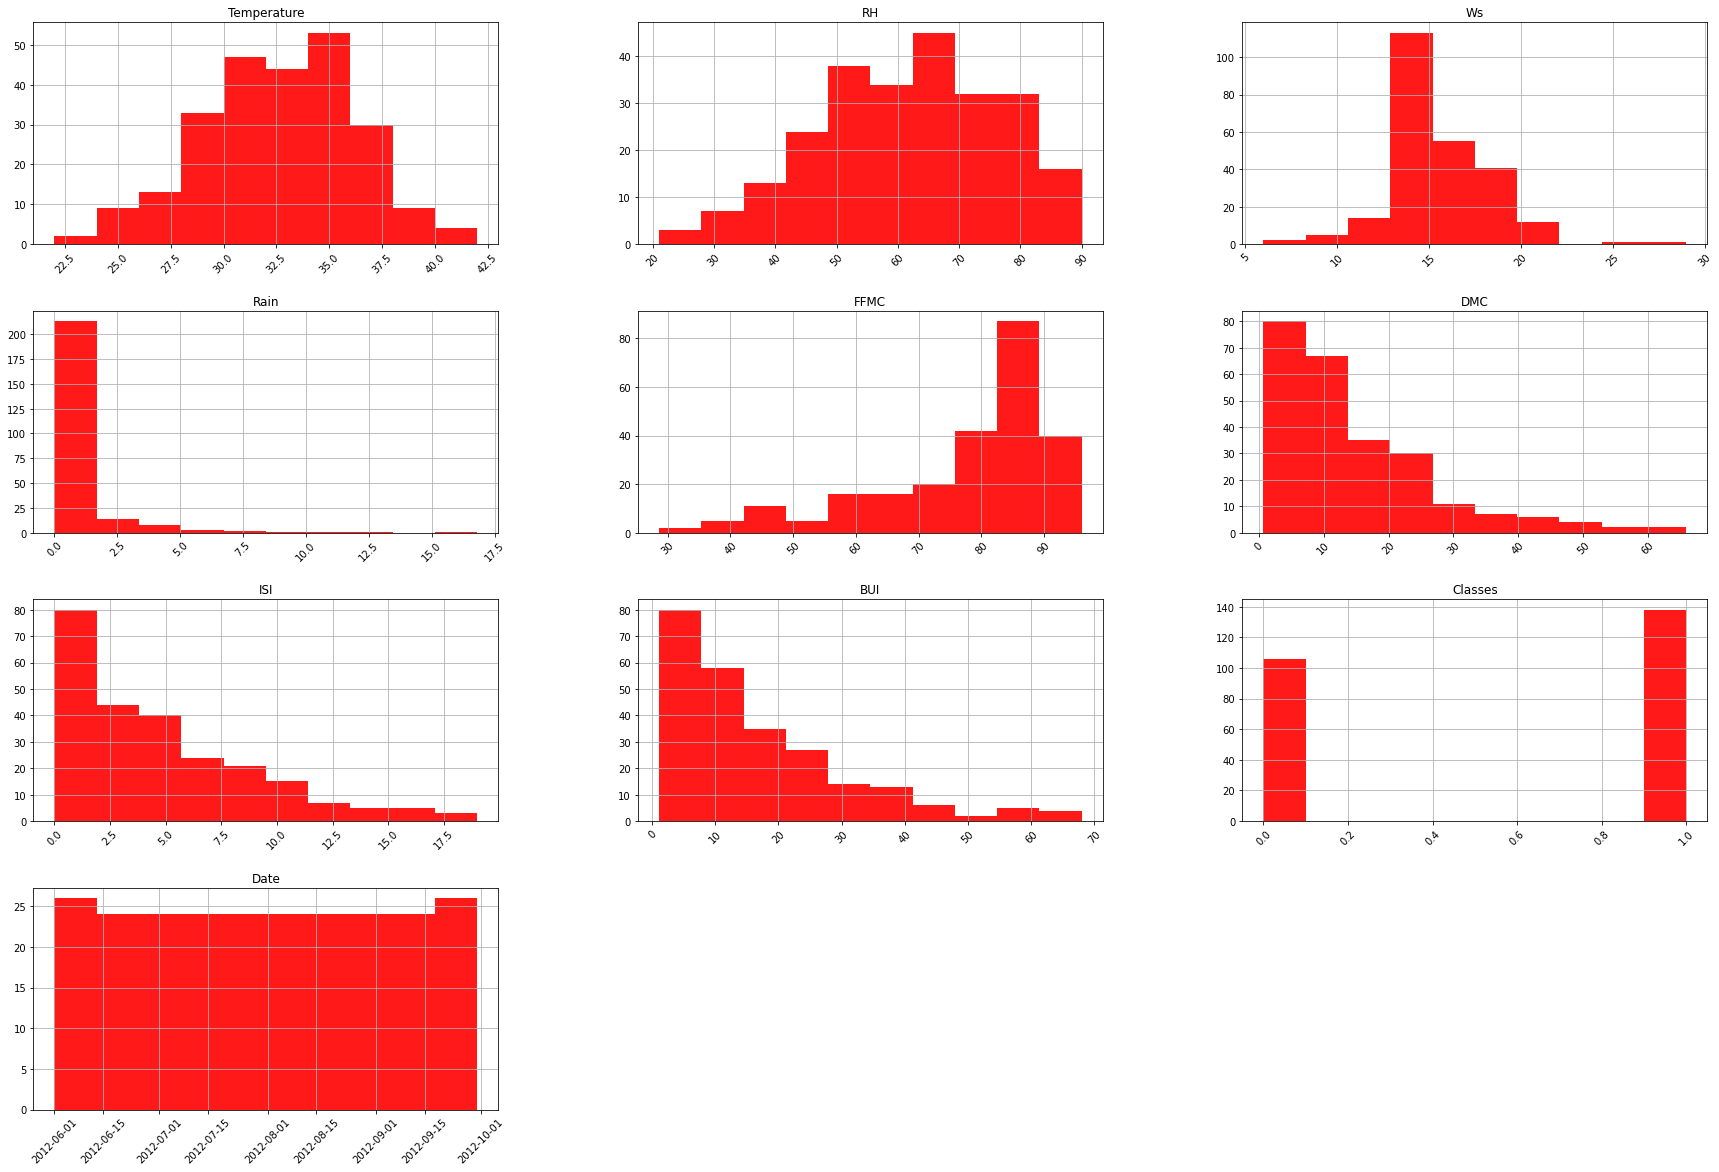

In [128]:
# to construct histograms for all columns
data.hist(figsize = (30,20), color='r', xrot = 45, alpha=0.9);


### Temperature Ranges between:


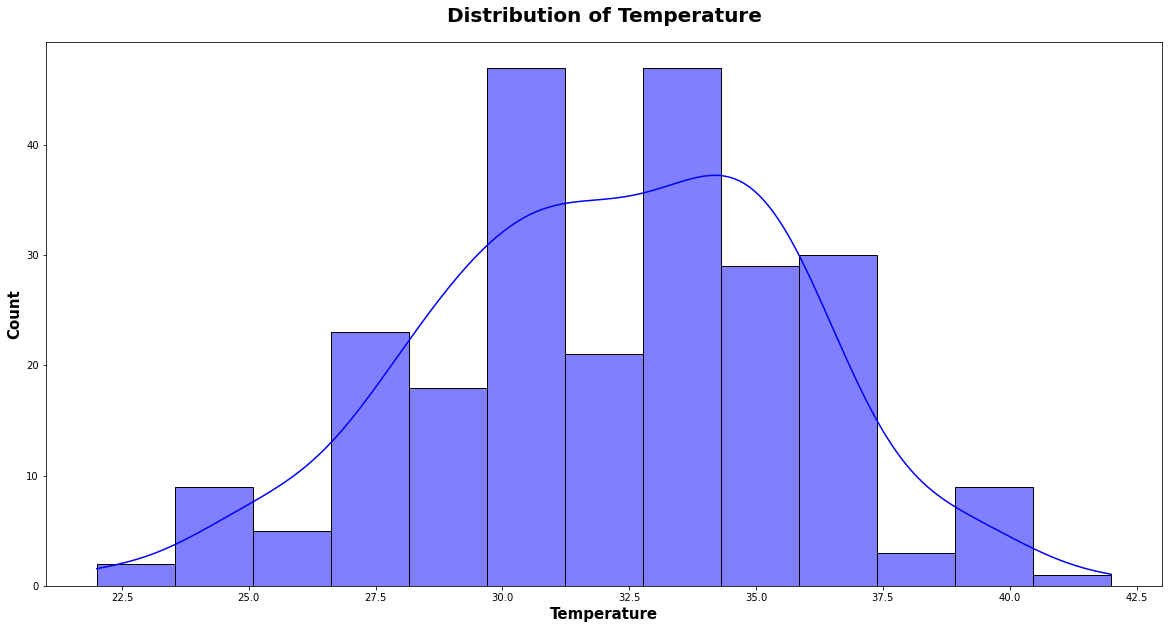

In [132]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of temperature",x =data.Temperature,color ="b",kde = True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

### Comparison of Rain and Temperature with respect to Classes(Fire and Not Fire)


In [134]:
#determine fire and nonfire
data['Classes'].value_counts()

1.0    138
0.0    106
Name: Classes, dtype: int64

 1: represents: Fire
 
0: represents: NotFire

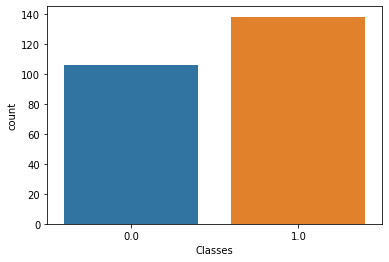

In [135]:
sns.countplot(data['Classes']);


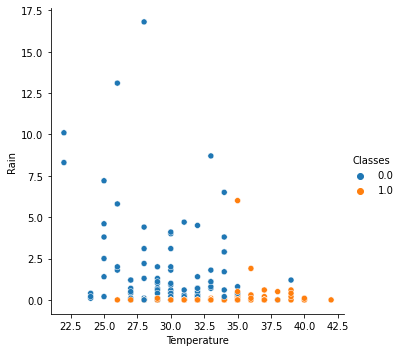

In [137]:
sns.relplot(x='Temperature', y='Rain', hue='Classes', data=data);

### Observation-

High Temperature leads to Fire and less rain

Low Temperature leads to Not Fire and massive rain

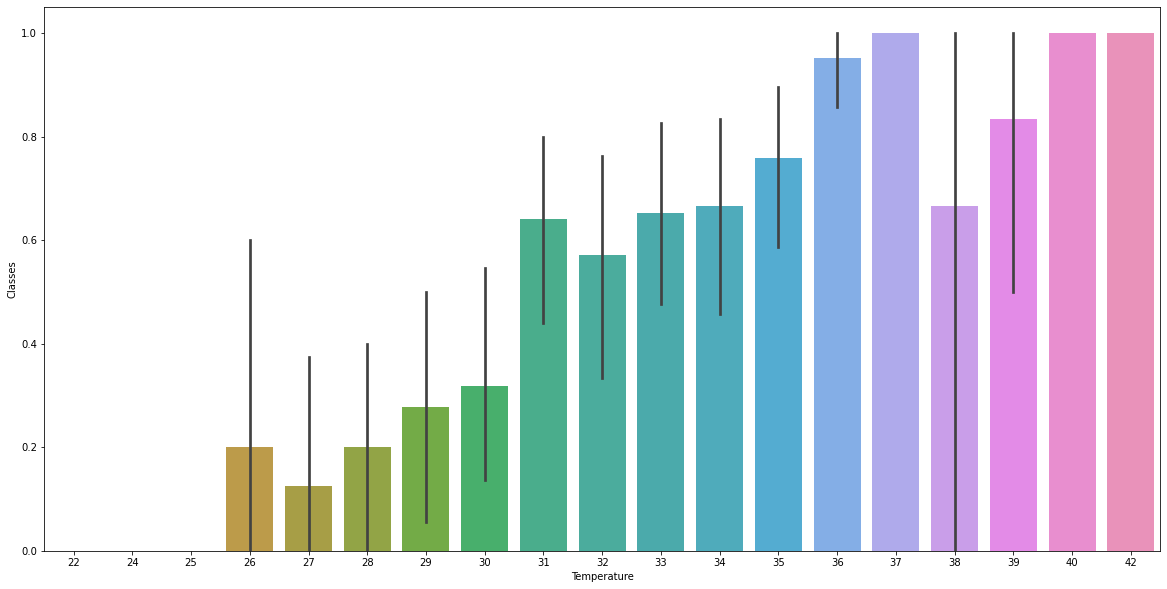

In [139]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=data);

### High Temperature attain at 42,40,37



## Which region has most time rain happens


<AxesSubplot:xlabel='Region', ylabel='Rain'>

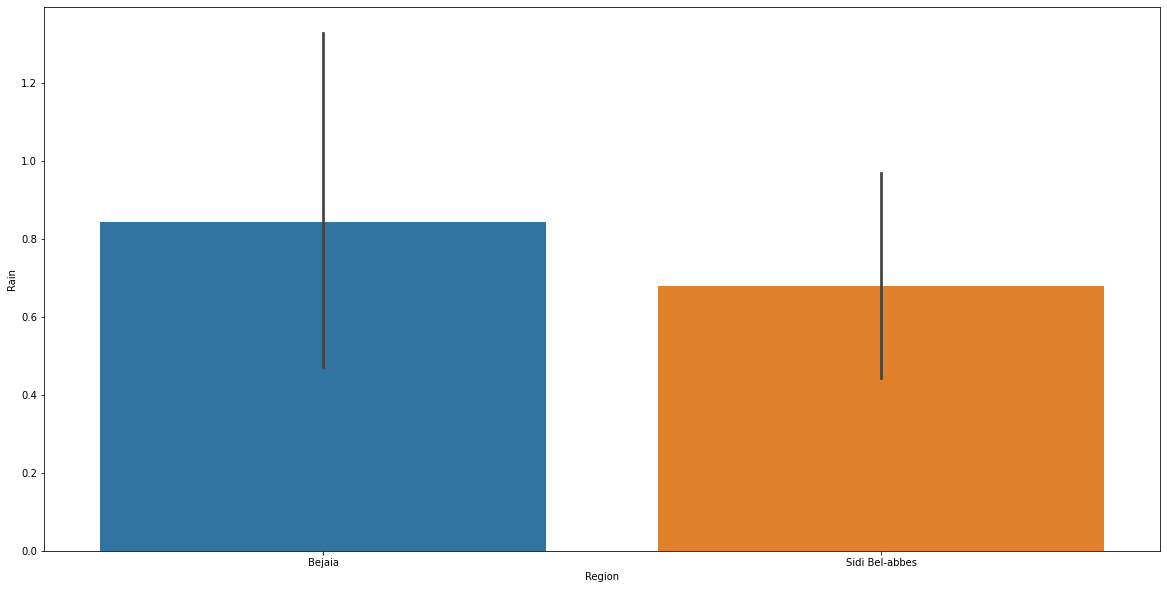

In [141]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Region",y="Rain",data=data)

### Observation- Bejaia region has most of the Rain as compare to Siddi-Bei-abbes



## Boxplot of Class Vs Temperature


<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

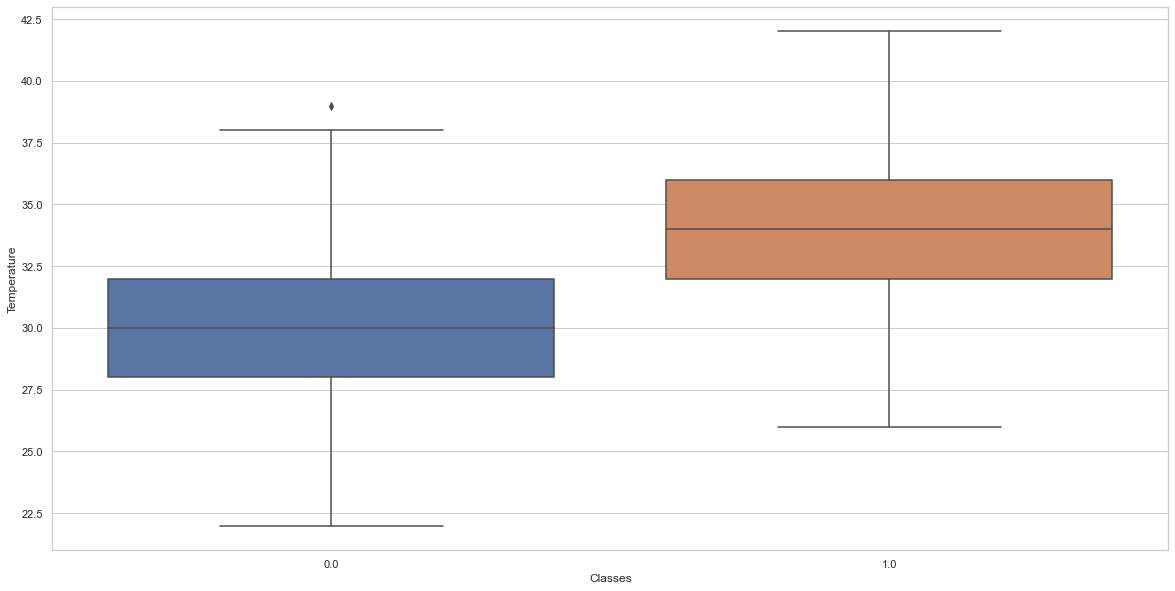

In [142]:
sns.set(style="whitegrid")
sns.boxplot(x ='Classes', y ='Temperature', data = data)

## Boxplot of Classes Vs Rain


<AxesSubplot:xlabel='Classes', ylabel='Rain'>

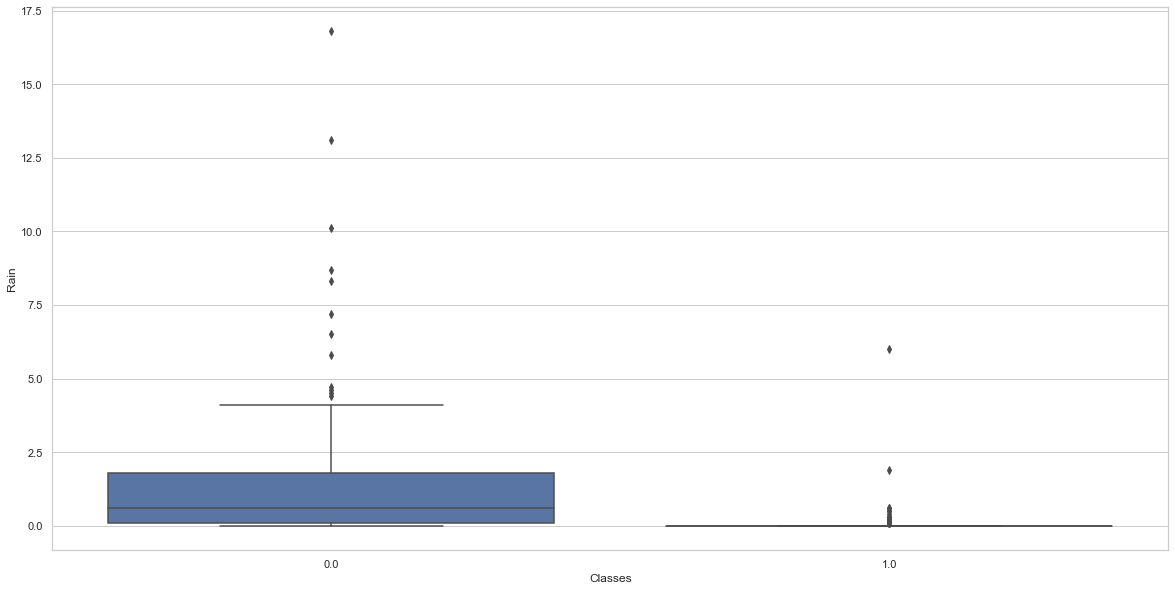

In [145]:
sns.set(style="whitegrid")
sns.boxplot(x ='Classes', y ='Rain', data = data)

In [146]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


### Relation between Rain and RH


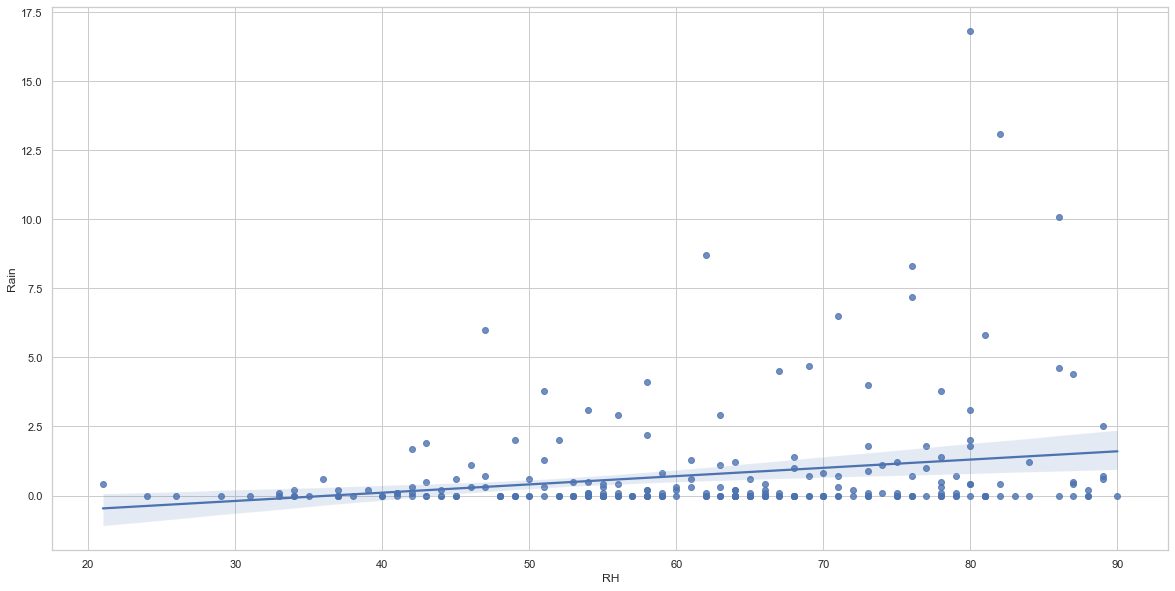

In [148]:
#seaborn: regplot(system draws reggression line on the data points to find the best fitted line)
sns.regplot(x=data.RH, y=data.Rain)

sns.set(rc={'figure.figsize':(11.7,4.27)}) #fig size in Seaborn

### Observation-

On increasing Rain Relative Humidity(RH) increases
 
 